# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for this week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [1]:
from __future__ import print_function
import os
data_path = ['data']

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [2]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
data = pd.read_csv(filepath)

In [3]:
data

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [4]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [5]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [6]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   intl_plan                      5000 non-null   object 
 2   voice_mail_plan                5000 non-null   object 
 3   number_vmail_messages          5000 non-null   int64  
 4   total_day_minutes              5000 non-null   float64
 5   total_day_calls                5000 non-null   int64  
 6   total_day_charge               5000 non-null   float64
 7   total_eve_minutes              5000 non-null   float64
 8   total_eve_calls                5000 non-null   int64  
 9   total_eve_charge               5000 non-null   float64
 10  total_night_minutes            5000 non-null   float64
 11  total_night_calls              5000 non-null   int64  
 12  total_night_charge             5000 non-null   f

In [8]:
data.head(10)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
number_vmail_messages,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
total_day_minutes,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
total_day_calls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
total_day_charge,5000.0,30.649668,9.162069,0.0,24.430,30.62,36.75,59.76
total_eve_minutes,5000.0,200.636560,50.551309,0.0,166.375,201.00,234.10,363.70
total_eve_calls,5000.0,100.191000,19.826496,0.0,87.000,100.00,114.00,170.00
total_eve_charge,5000.0,17.054322,4.296843,0.0,14.140,17.09,19.90,30.91
total_night_minutes,5000.0,200.391620,50.527789,0.0,166.900,200.40,234.70,395.00
total_night_calls,5000.0,99.919200,19.958686,0.0,87.000,100.00,113.00,175.00


## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [15]:
data[['intl_plan', 'voice_mail_plan', 'churned']]

,intl_plan,voice_mail_plan,churned
0,no,yes,False
1,no,yes,False
2,no,no,False
3,yes,no,False
4,yes,no,False
...,...,...,...
4995,no,yes,False
4996,no,no,True
4997,no,no,False
4998,no,no,False


In [10]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [11]:
data[['intl_plan', 'voice_mail_plan', 'churned']]

,intl_plan,voice_mail_plan,churned
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4995,0,1,0
4996,0,0,1
4997,0,0,0
4998,0,0,0


In [12]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [13]:
data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0.0
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333,1.0
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111,0.0
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000,0.0


In [51]:
data.corr()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
account_length,1.000000,0.014681,-0.006650,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445,0.021203
intl_plan,0.014681,1.000000,0.009054,0.011947,0.028138,0.008102,0.028141,0.021235,0.002505,0.021234,-0.026508,0.005623,-0.026510,0.031799,0.004493,0.031751,-0.012974,0.259123
voice_mail_plan,-0.006650,0.009054,1.000000,0.954508,0.002059,-0.001735,0.002056,0.023328,-0.005916,0.023332,0.005524,0.009176,0.005522,0.004116,-0.007525,0.004165,-0.014453,-0.110698
number_vmail_messages,-0.014575,0.011947,0.954508,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086,-0.097633
total_day_minutes,-0.001017,0.028138,0.002059,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733,0.207705
total_day_calls,0.028240,0.008102,-0.001735,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739,0.016130
total_day_charge,-0.001019,0.028141,0.002056,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726,0.207700
total_eve_minutes,-0.009591,0.021235,0.023328,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823,0.089288
total_eve_calls,0.009143,0.002505,-0.005916,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235,-0.006284
total_eve_charge,-0.009587,0.021234,0.023332,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836,0.089282


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [14]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [15]:
X_data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [16]:
y_data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    1.0
4997    0.0
4998    0.0
4999    0.0
Name: churned, Length: 5000, dtype: float64

In [17]:
print(X_data.shape, y_data.shape)

(5000, 17) (5000,)


In [18]:
## Train Test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X_data, y_data, test_size = 0.3)

In [19]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3500, 17) (3500,)
(1500, 17) (1500,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
res = {}
for k in range(3,20):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, Y_train)
    print("Training Accuracy for k  = {} is {}" .format(k, knn.score(X_train, Y_train)))
    print("Testing Accuracy for k  = {} is {}" .format(k, knn.score(X_test, Y_test)))
    res[k] =  knn.score(X_test, Y_test)

Training Accuracy for k  = 3 is 0.9405714285714286
Testing Accuracy for k  = 3 is 0.8986666666666666
Training Accuracy for k  = 4 is 0.9148571428571428
Testing Accuracy for k  = 4 is 0.8906666666666667
Training Accuracy for k  = 5 is 0.9288571428571428
Testing Accuracy for k  = 5 is 0.902
Training Accuracy for k  = 6 is 0.9077142857142857
Testing Accuracy for k  = 6 is 0.894
Training Accuracy for k  = 7 is 0.9228571428571428
Testing Accuracy for k  = 7 is 0.9013333333333333
Training Accuracy for k  = 8 is 0.908
Testing Accuracy for k  = 8 is 0.8933333333333333
Training Accuracy for k  = 9 is 0.9168571428571428
Testing Accuracy for k  = 9 is 0.9013333333333333
Training Accuracy for k  = 10 is 0.9048571428571428
Testing Accuracy for k  = 10 is 0.892
Training Accuracy for k  = 11 is 0.9134285714285715
Testing Accuracy for k  = 11 is 0.8986666666666666
Training Accuracy for k  = 12 is 0.9034285714285715
Testing Accuracy for k  = 12 is 0.8906666666666667
Training Accuracy for k  = 13 is 0.9

In [31]:
res

{3: 0.8986666666666666,
 4: 0.8906666666666667,
 5: 0.902,
 6: 0.894,
 7: 0.9013333333333333,
 8: 0.8933333333333333,
 9: 0.9013333333333333,
 10: 0.892,
 11: 0.8986666666666666,
 12: 0.8906666666666667,
 13: 0.8953333333333333,
 14: 0.8866666666666667,
 15: 0.894,
 16: 0.886,
 17: 0.8926666666666667,
 18: 0.8846666666666667,
 19: 0.8893333333333333}

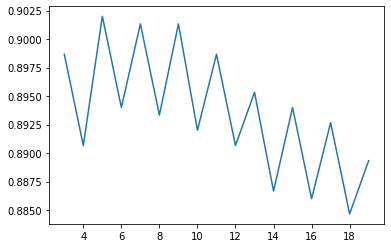

In [32]:
import matplotlib.pyplot as plt
plt.plot(res.keys() , res.values())

In [41]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(3,20):
    knn = KNeighborsClassifier(n_neighbors=k )
    knn = knn.fit(X_train, Y_train)
    print("Training Accuracy{} for k = {}".format(knn.score(X_train, Y_train) ,k  ))
    print("Test Accuracy{} for k = {}".format(knn.score(X_test, Y_test) ,k  ))

Training Accuracy0.9391428571428572 for k = 3
Test Accuracy0.892 for k = 3
Training Accuracy0.9171428571428571 for k = 4
Test Accuracy0.8826666666666667 for k = 4
Training Accuracy0.93 for k = 5
Test Accuracy0.892 for k = 5
Training Accuracy0.916 for k = 6
Test Accuracy0.884 for k = 6
Training Accuracy0.9254285714285714 for k = 7
Test Accuracy0.888 for k = 7
Training Accuracy0.9085714285714286 for k = 8
Test Accuracy0.884 for k = 8
Training Accuracy0.9162857142857143 for k = 9
Test Accuracy0.894 for k = 9
Training Accuracy0.9031428571428571 for k = 10
Test Accuracy0.8886666666666667 for k = 10
Training Accuracy0.912 for k = 11
Test Accuracy0.8906666666666667 for k = 11
Training Accuracy0.902 for k = 12
Test Accuracy0.882 for k = 12
Training Accuracy0.9074285714285715 for k = 13
Test Accuracy0.886 for k = 13
Training Accuracy0.9 for k = 14
Test Accuracy0.8806666666666667 for k = 14
Training Accuracy0.906 for k = 15
Test Accuracy0.886 for k = 15
Training Accuracy0.8974285714285715 for k 

In [33]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [42]:
y_pred =  knn.predict(X_test)

In [43]:
y_pred.shape

(1500,)

In [46]:
from sklearn.metrics import confusion_matrix , classification_report
print(confusion_matrix(y_pred, Y_test))

[[1270  130]
 [  17   83]]


In [47]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      1400
         1.0       0.39      0.83      0.53       100

    accuracy                           0.90      1500
   macro avg       0.69      0.87      0.74      1500
weighted avg       0.95      0.90      0.92      1500



In [50]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))


0.8685714285714285
0.8666666666666667


## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [ ]:
#Student writes code here

## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [ ]:
#Student writes code here